In [ ]:
# %pip install --upgrade kagglehub
import kagglehub

# Download latest version
kaggle_path = kagglehub.dataset_download("devantltd/analysing-second-hand-car-sales-data")

path = kaggle_path + "/second_hand_car_sales.csv"
print("Path to dataset files:", path)

In [ ]:
import os
import pandas as pd

df = pd.read_csv(path)


print("Number of rows:", df.shape)
df.head()
df["Manufacturer"].unique()

#encode manufacturer to numerical values
df["Manufacturer"] = df["Manufacturer"].astype("category").cat.codes
df["Model"] = df["Model"].astype("category").cat.codes
df["Fuel Type"] = df["Fuel Type"].astype("category").cat.codes

#normalize Mileage and Price (£)
df["Mileage"] = (df["Mileage"] - df["Mileage"].min()) / (df["Mileage"].max() - df["Mileage"].min()) * 10
df["Price (£)"] = (df["Price (£)"] - df["Price (£)"].min()) / (df["Price (£)"].max() - df["Price (£)"].min()) *10
df["Year of Manufacture"] = (df["Year of Manufacture"] - df["Year of Manufacture"].min()) / (df["Year of Manufacture"].max() - df["Year of Manufacture"].min()) * 10

df.head()


x_train = df.drop(columns=["Price (£)"])
y_train = df["Price (£)"]

print("Training data shape:\n", x_train)
print("Result data shape:\n", y_train)



In [ ]:
import matplotlib.pyplot as plt

# plot a graph of the training data
plt.figure(figsize=(30, 7))

for i in range(5,6):
    plt.plot(x_train.iloc[1:20, i], y_train[1:20], marker='o', label=x_train.columns[i])
plt.xlabel('Features')
plt.ylabel('Price (£)')
plt.title('Training Data Visualization')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from tensorflow import keras 
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization, Input

In [ ]:
input_layer = Input(shape=(x_train.shape[1],))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)
output_layer = Dense(1, activation='linear')(hidden_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae','accuracy'])

In [19]:
training_history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0000e+00 - loss: 9.0148 - mae: 2.5675 - mse: 9.0148 - val_accuracy: 0.0000e+00 - val_loss: 8.4871 - val_mae: 2.5120 - val_mse: 8.4871
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0000e+00 - loss: 8.5196 - mae: 2.5175 - mse: 8.5196 - val_accuracy: 0.0000e+00 - val_loss: 9.4869 - val_mae: 2.6165 - val_mse: 9.4869
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0000e+00 - loss: 8.5048 - mae: 2.5152 - mse: 8.5048 - val_accuracy: 0.0000e+00 - val_loss: 8.3465 - val_mae: 2.4951 - val_mse: 8.3465
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0000e+00 - loss: 8.4924 - mae: 2.5143 - mse: 8.4924 - val_accuracy: 0.0000e+00 - val_loss: 8.7284 - val_mae: 2.5333 - val_mse: 8.7284
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0000e+00 - loss: 8.4835 - mae: 2.5147 - mse: 8.4835 - val_accuracy: 0.0000e+00 - val_loss: 8.3241 - val_mae: 2.4915 - val_mse: 8.3241
E

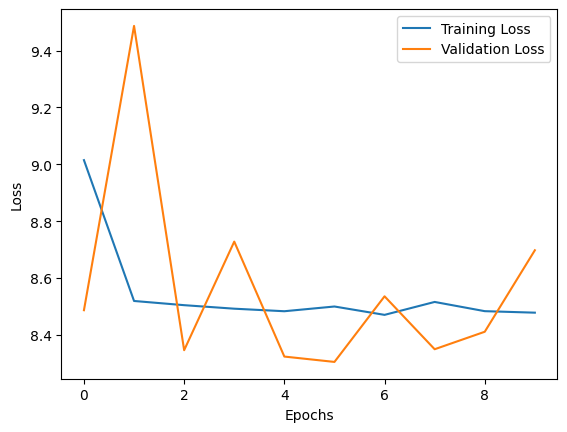

In [20]:
import matplotlib.pyplot as plt

plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
index = 18
pred = model.predict(x_train.iloc[[index]])
print("Predicted Price (£):", pred[0][0])
print("Actual Price (£):", y_train.iloc[index])

plt.plot([pred[0][0]], [y_train.iloc[index]], marker='o', markersize=10, color='red', label='Predicted Price (£)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Price (£): 4.950459
Actual Price (£): 3.197208106287883
difference: 1.7532508971606031
